In [ ]:
#pip install keras
import keras as keras

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
inputs = keras.Input(shape = (256,256,3))
x = layers.Rescaling(1./255)(inputs)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                        

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory
new_base_dir = "/content/drive/MyDrive/brain_tumor_mri_small"

In [ ]:
train_dataset = image_dataset_from_directory(
    "/content/drive/MyDrive/brain_tumor_mri_small/train",
    image_size=(256, 256),
    batch_size=32)

Found 3600 files belonging to 4 classes.


In [ ]:
validation_dataset = image_dataset_from_directory(
    "/content/drive/MyDrive/brain_tumor_mri_small/validation",
    image_size=(256, 256),
    batch_size=32)

test_dataset = image_dataset_from_directory(
    "/content/drive/MyDrive/brain_tumor_mri_small/test",
    image_size=(256, 256),
    batch_size=32)

Found 1600 files belonging to 4 classes.
Found 1200 files belonging to 4 classes.


In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch.keras",
        save_best_only=True,
        monitor="val_loss")
    ]

In [ ]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/30
113/113 [==============================] - ETA: 0s - loss: 0.9782 - accuracy: 0.6019

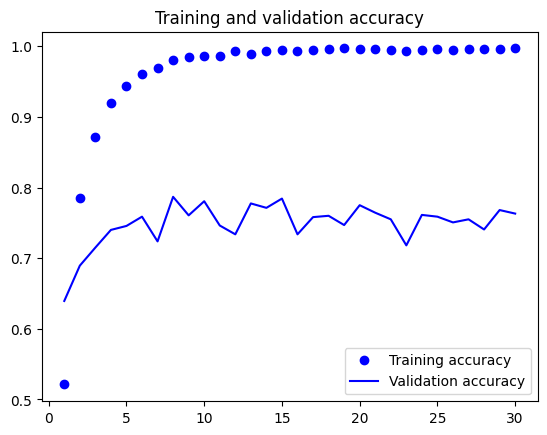

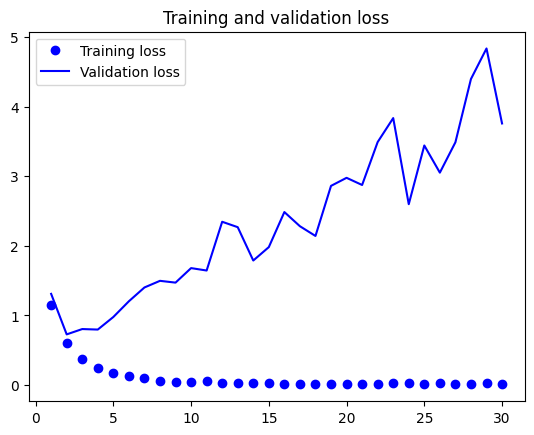

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model("convnet_from_scratch.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

38/38 [==============================] - 39s 786ms/step - loss: 0.6698 - accuracy: 0.7300
Test accuracy: 0.730


In [ ]:
###############################
### Using Data Augmentation ###
###############################






In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
        ]
    )

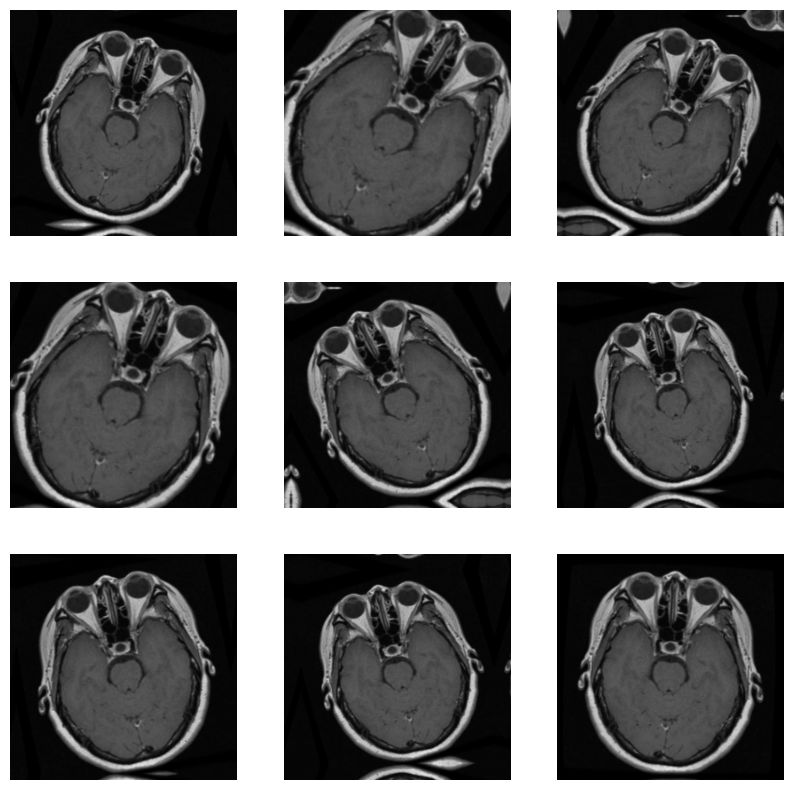

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
inputs = keras.Input(shape=(256, 256, 3))
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
    ]

In [ ]:
history = model.fit(
    train_dataset,
    epochs=100,
    validation_data=validation_dataset,
    callbacks=callbacks)

Epoch 1/100
113/113 [==============================] - 11s 69ms/step - loss: 1.2693 - accuracy: 0.4419 - val_loss: 1.0651 - val_accuracy: 0.5344
Epoch 2/100
113/113 [==============================] - 8s 67ms/step - loss: 0.9162 - accuracy: 0.6236 - val_loss: 0.8312 - val_accuracy: 0.6181
Epoch 3/100
113/113 [==============================] - 8s 68ms/step - loss: 0.7424 - accuracy: 0.7050 - val_loss: 1.6713 - val_accuracy: 0.4700
Epoch 4/100
113/113 [==============================] - 8s 66ms/step - loss: 0.6590 - accuracy: 0.7511 - val_loss: 0.6682 - val_accuracy: 0.7275
Epoch 5/100
113/113 [==============================] - 8s 67ms/step - loss: 0.5904 - accuracy: 0.7711 - val_loss: 1.8440 - val_accuracy: 0.6419
Epoch 6/100
113/113 [==============================] - 8s 70ms/step - loss: 0.5303 - accuracy: 0.7969 - val_loss: 0.6567 - val_accuracy: 0.7169
Epoch 7/100
113/113 [==============================] - 8s 69ms/step - loss: 0.4820 - accuracy: 0.8214 - val_loss: 0.5548 - val_accuracy

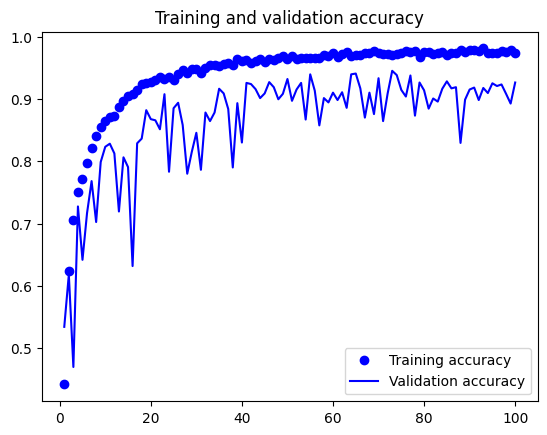

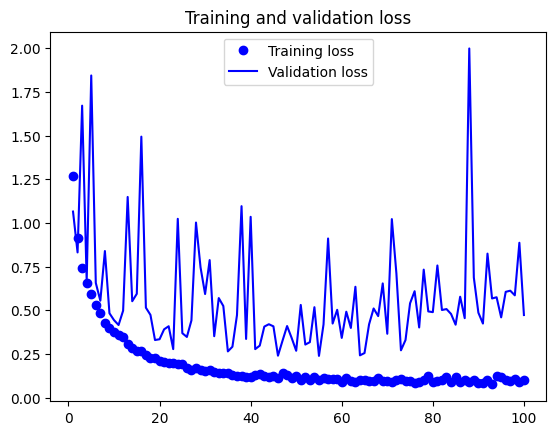

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_model = keras.models.load_model(
"convnet_from_scratch_with_augmentation.keras")
test_loss, test_acc = test_model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.3f}")

38/38 [==============================] - 2s 37ms/step - loss: 0.1644 - accuracy: 0.9525
Test accuracy: 0.952


In [ ]:
####################################
### Leveraging Pre-trained Model ###
####################################

conv_base = keras.applications.vgg16.VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(256, 256, 3))

conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
      preprocessed_images = keras.applications.vgg16.preprocess_input(images)
      features = conv_base.predict(preprocessed_images)
      all_features.append(features)
      all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

In [ ]:
train_features, train_labels = get_features_and_labels(train_dataset)
val_features, val_labels = get_features_and_labels(validation_dataset)
test_features, test_labels = get_features_and_labels(test_dataset)

1/1 [==============================] - 0s 26ms/step


In [ ]:
train_features.shape

(3600, 8, 8, 512)

In [ ]:
inputs = keras.Input(shape=(8, 8, 512))
x = layers.Flatten()(inputs)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="convnet_feature_extraction.keras",
        save_best_only=True,
        monitor="val_loss")
    ]

In [ ]:
history = model.fit(
    train_features, train_labels,
    epochs=20,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/20
113/113 [==============================] - 2s 12ms/step - loss: 58.9090 - accuracy: 0.8136 - val_loss: 54.1488 - val_accuracy: 0.8012
Epoch 2/20
113/113 [==============================] - 1s 5ms/step - loss: 17.2097 - accuracy: 0.9228 - val_loss: 90.6047 - val_accuracy: 0.7919
Epoch 3/20
113/113 [==============================] - 1s 6ms/step - loss: 10.7875 - accuracy: 0.9511 - val_loss: 55.6716 - val_accuracy: 0.8319
Epoch 4/20
113/113 [==============================] - 1s 8ms/step - loss: 8.2630 - accuracy: 0.9597 - val_loss: 50.8397 - val_accuracy: 0.8381
Epoch 5/20
113/113 [==============================] - 1s 8ms/step - loss: 6.3153 - accuracy: 0.9711 - val_loss: 47.4155 - val_accuracy: 0.8425
Epoch 6/20
113/113 [==============================] - 1s 5ms/step - loss: 4.8687 - accuracy: 0.9747 - val_loss: 59.4938 - val_accuracy: 0.8294
Epoch 7/20
113/113 [==============================] - 1s 6ms/step - loss: 3.6868 - accuracy: 0.9814 - val_loss: 73.2677 - val_accuracy: 0.

In [ ]:
import tensorflow as tf

# Load the model
test_model = tf.keras.models.load_model("convnet_feature_extraction.keras")

# Evaluate the model on test data
result = test_model.evaluate(test_features, test_labels)

# Print the test accuracy
print(f"Test accuracy: {result[1]:.3f}")

38/38 [==============================] - 0s 3ms/step - loss: 25.4895 - accuracy: 0.9092
Test accuracy: 0.909


In [ ]:
## Feature Extraction with Data Augmentation using VGG16 pretrained model
conv_base = keras.applications.vgg16.VGG16(
weights="imagenet",
include_top=False)
conv_base.trainable = False




In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
        ]
    )

In [ ]:
inputs = keras.Input(shape=(256, 256, 3))
x = data_augmentation(inputs)
x = keras.applications.vgg16.preprocess_input(x) # choose this when base model is dense net169
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
    ]

In [ ]:
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset)
    #callbacks=callbacks)

Epoch 1/50
113/113 [==============================] - 28s 160ms/step - loss: 63.4827 - accuracy: 0.7256 - val_loss: 47.5090 - val_accuracy: 0.7031
Epoch 2/50
113/113 [==============================] - 15s 134ms/step - loss: 25.4684 - accuracy: 0.8203 - val_loss: 28.5353 - val_accuracy: 0.8438
Epoch 3/50
113/113 [==============================] - 15s 134ms/step - loss: 18.8884 - accuracy: 0.8564 - val_loss: 50.5508 - val_accuracy: 0.6463
Epoch 4/50
113/113 [==============================] - 15s 133ms/step - loss: 15.2310 - accuracy: 0.8697 - val_loss: 71.7449 - val_accuracy: 0.6862
Epoch 5/50
113/113 [==============================] - 15s 132ms/step - loss: 12.2203 - accuracy: 0.8817 - val_loss: 11.0082 - val_accuracy: 0.8587
Epoch 6/50
113/113 [==============================] - 15s 133ms/step - loss: 10.0048 - accuracy: 0.8817 - val_loss: 10.1537 - val_accuracy: 0.8806
Epoch 7/50
113/113 [==============================] - 15s 133ms/step - loss: 9.2278 - accuracy: 0.8900 - val_loss: 25.

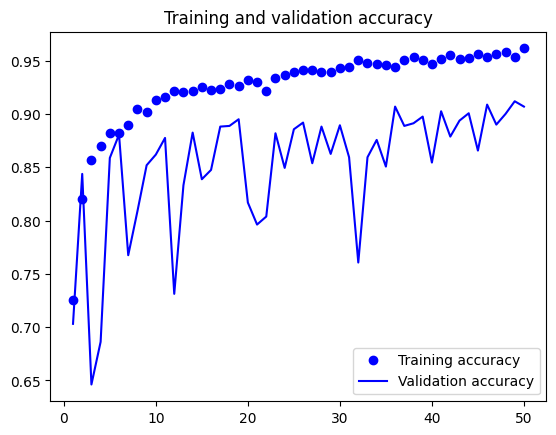

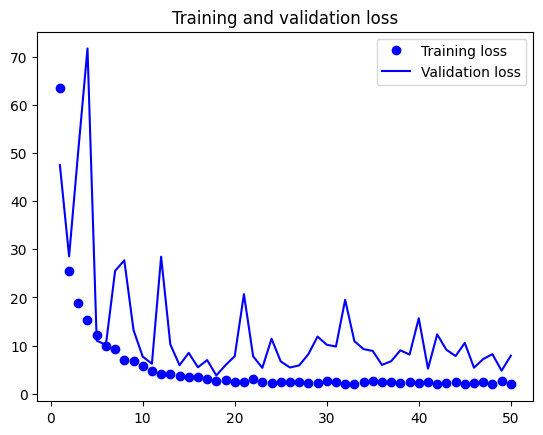

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)

38/38 [==============================] - 5s 127ms/step - loss: 19.9220 - accuracy: 0.9158


In [ ]:
#############################
### Fine-tuning the model ###
#############################

# On top of the model I have so far(I have trained top classification layer with data augmentation),
#I am going to unfreeze last four layers of CNN which captures the characteristics of more abstract features of the images.
# and retrain those layers of the model, so that it would not only take advantage of pretrained model, but would it also custimize to my dataset (brain tumor dataset)
#
# use this when base model is vgg16
conv_base.trainable = True
for layer in conv_base.layers[:-4]:
  layer.trainable = False


In [ ]:
# we are going to use very low learning rate.
# The reason for using a low learning rate is that we want to limit the magnitude of the modifications we make to the representations of the three layers we are fine tuning.
# Updates that are too large may harm these representations.
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),   # we are going to use very low learning rate
              metrics=["accuracy"])

In [ ]:
callbacks = [keras.callbacks.ModelCheckpoint(
    filepath="fine_tuning.keras",
    save_best_only=True,
    monitor="val_loss")
]

In [ ]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset)
    #callbacks=callbacks)

Epoch 1/30
113/113 [==============================] - 38s 190ms/step - loss: 5.3691 - accuracy: 0.9189 - val_loss: 7.9106 - val_accuracy: 0.9044
Epoch 2/30
113/113 [==============================] - 15s 127ms/step - loss: 2.2414 - accuracy: 0.9608 - val_loss: 7.5455 - val_accuracy: 0.9106
Epoch 3/30
113/113 [==============================] - 15s 127ms/step - loss: 1.2558 - accuracy: 0.9711 - val_loss: 6.7713 - val_accuracy: 0.9144
Epoch 4/30
113/113 [==============================] - 15s 127ms/step - loss: 1.3518 - accuracy: 0.9717 - val_loss: 6.7418 - val_accuracy: 0.9162
Epoch 5/30
113/113 [==============================] - 15s 126ms/step - loss: 1.2074 - accuracy: 0.9697 - val_loss: 6.5579 - val_accuracy: 0.9162
Epoch 6/30
113/113 [==============================] - 15s 127ms/step - loss: 1.1012 - accuracy: 0.9756 - val_loss: 6.4579 - val_accuracy: 0.9175
Epoch 7/30
113/113 [==============================] - 15s 127ms/step - loss: 1.0376 - accuracy: 0.9778 - val_loss: 6.2850 - val_ac

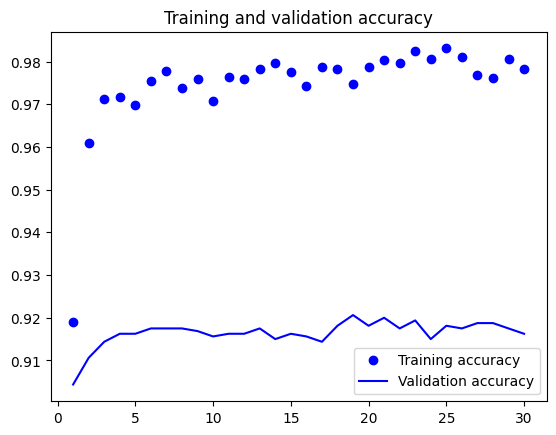

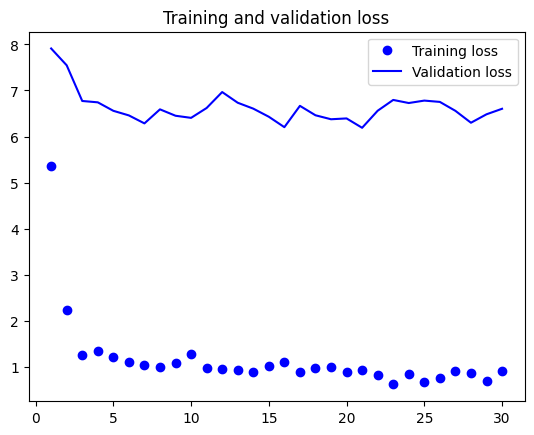

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)

38/38 [==============================] - 4s 86ms/step - loss: 4.3032 - accuracy: 0.9467


In [ ]:
#how to save model in the folder
model.save('conv_brain_tumor_fine_tuning_python', save_format='tf')

In [ ]:
#How to zip the save folder.

import shutil
# Specify the path of the folder you want to zip
folder_path = '/content/conv_brain_tumor_fine_tuning'

# Specify the path for the zip file to be saved
zip_path = 'brain_tumor_fined_tuned.zip'

shutil.make_archive(zip_path, 'zip', folder_path)

'/content/brain_tumor_fined_tuned.zip.zip'

In [ ]:
from keras.models import Sequential
from keras.optimizers import Adamax
from keras.applications import DenseNet169
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Dropout, BatchNormalization
from keras import regularizers

In [ ]:
#######################################
### Using DenseNet Pretrained Model ###
#######################################

## Feature Extraction with Data Augmentation using DenseNet169 pretrained model
conv_base= keras.applications.densenet.DenseNet169(
    include_top = False, weights = "imagenet")

conv_base.trainable = False


data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
        layers.RandomZoom(0.2),
        ]
    )



In [ ]:
inputs = keras.Input(shape=(256, 256, 3))
x = data_augmentation(inputs)
x = keras.applications.densenet.preprocess_input(x) # choose this when base model is vgg16
#x = keras.applications.vgg16.preprocess_input(x) # choose this when base model is dense net169
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs, outputs)

In [ ]:
# more advanced model with batch_normalization, regularization...

inputs = keras.Input(shape=(256, 256, 3))
x = data_augmentation(inputs)
x = keras.applications.densenet.preprocess_input(x) # choose this when base model is vgg16
#x = keras.applications.vgg16.preprocess_input(x) # choose this when base model is dense net169
x = conv_base(x)
x = layers.Flatten()(x)
x = layers.Dense(256)(x)
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
x = Dense(256,
          kernel_regularizer=regularizers.l2(0.016),
          activity_regularizer=regularizers.l1(0.006),
          bias_regularizer=regularizers.l1(0.006),
          activation='relu')(x)
x = layers.Dropout(0.5)(x)

outputs = layers.Dense(4, activation="softmax")(x)
model = keras.Model(inputs, outputs)





In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentation.keras",
        save_best_only=True,
        monitor="val_loss")
    ]




In [ ]:
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset)
    #callbacks=callbacks)




Epoch 1/50
113/113 [==============================] - 28s 160ms/step - loss: 3.4058 - accuracy: 0.8211 - val_loss: 2.2342 - val_accuracy: 0.8369
Epoch 2/50
113/113 [==============================] - 16s 136ms/step - loss: 1.3515 - accuracy: 0.8897 - val_loss: 1.1033 - val_accuracy: 0.8450
Epoch 3/50
113/113 [==============================] - 16s 136ms/step - loss: 0.6849 - accuracy: 0.9192 - val_loss: 1.0433 - val_accuracy: 0.7694
Epoch 4/50
113/113 [==============================] - 16s 135ms/step - loss: 0.4759 - accuracy: 0.9294 - val_loss: 0.5430 - val_accuracy: 0.8719
Epoch 5/50
113/113 [==============================] - 16s 135ms/step - loss: 0.3990 - accuracy: 0.9283 - val_loss: 0.5336 - val_accuracy: 0.8562
Epoch 6/50
113/113 [==============================] - 16s 135ms/step - loss: 0.3445 - accuracy: 0.9447 - val_loss: 0.4855 - val_accuracy: 0.8863
Epoch 7/50
113/113 [==============================] - 16s 135ms/step - loss: 0.3216 - accuracy: 0.9447 - val_loss: 0.4458 - val_ac

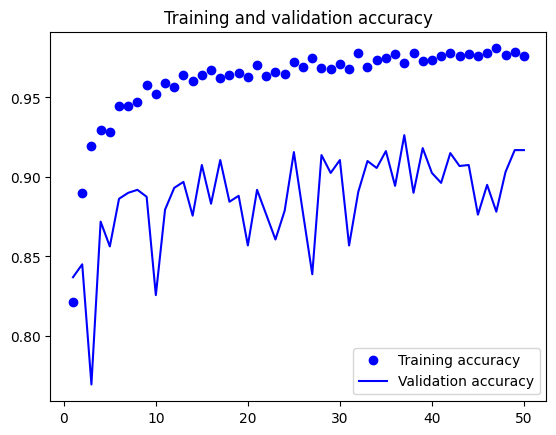

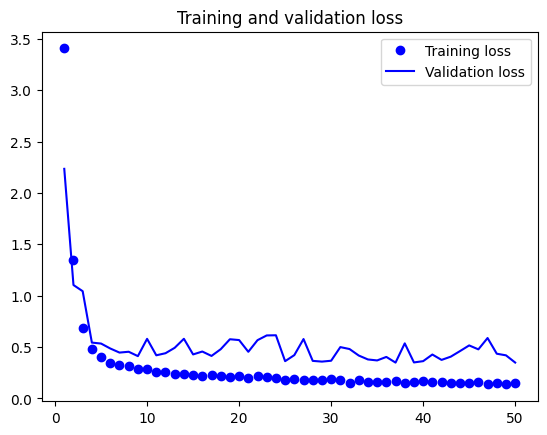

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
#choose this when base model is DenseNet169
conv_base.trainable = True
for layer in conv_base.layers[:-10]:
  layer.trainable = False




In [ ]:
# we are going to use very low learning rate.
# The reason for using a low learning rate is that we want to limit the magnitude of the modifications we make to the representations of the three layers we are fine tuning.
# Updates that are too large may harm these representations.
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.RMSprop(learning_rate=1e-5),   # we are going to use very low learning rate
              metrics=["accuracy"])

callbacks = [keras.callbacks.ModelCheckpoint(
    filepath="fine_tuning.keras",
    save_best_only=True,
    monitor="val_loss")
]



In [ ]:
history = model.fit(
    train_dataset,
    epochs=30,
    validation_data=validation_dataset)
    #callbacks=callbacks)

Epoch 1/30
113/113 [==============================] - 27s 153ms/step - loss: 0.1421 - accuracy: 0.9783 - val_loss: 0.3620 - val_accuracy: 0.9125
Epoch 2/30
113/113 [==============================] - 15s 129ms/step - loss: 0.1445 - accuracy: 0.9767 - val_loss: 0.3759 - val_accuracy: 0.9100
Epoch 3/30
113/113 [==============================] - 15s 129ms/step - loss: 0.1299 - accuracy: 0.9831 - val_loss: 0.3851 - val_accuracy: 0.9062
Epoch 4/30
113/113 [==============================] - 15s 129ms/step - loss: 0.1257 - accuracy: 0.9819 - val_loss: 0.3996 - val_accuracy: 0.9106
Epoch 5/30
113/113 [==============================] - 15s 128ms/step - loss: 0.1217 - accuracy: 0.9822 - val_loss: 0.4018 - val_accuracy: 0.9087
Epoch 6/30
113/113 [==============================] - 15s 129ms/step - loss: 0.1258 - accuracy: 0.9833 - val_loss: 0.3922 - val_accuracy: 0.9106
Epoch 7/30
113/113 [==============================] - 15s 129ms/step - loss: 0.1168 - accuracy: 0.9856 - val_loss: 0.3940 - val_ac

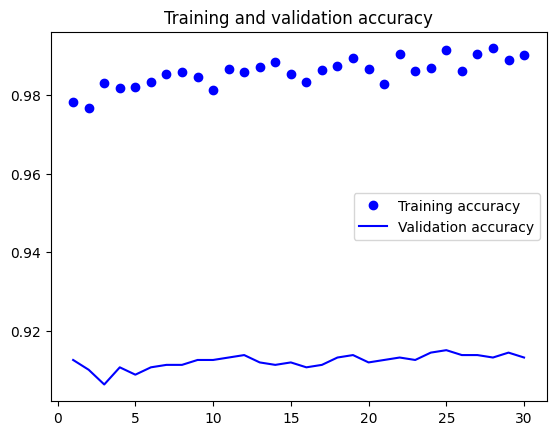

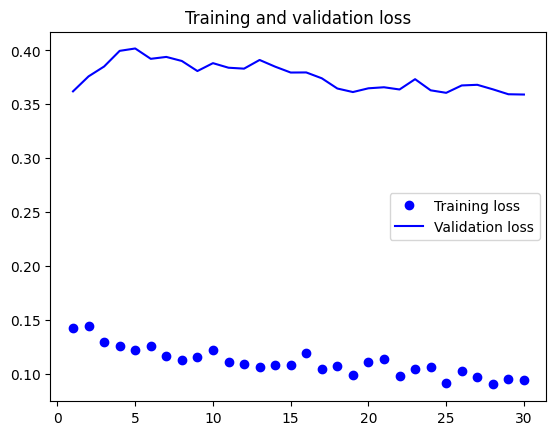

In [ ]:
import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)

38/38 [==============================] - 4s 87ms/step - loss: 0.2365 - accuracy: 0.9550


In [ ]:
#model.save('conv_brain_tumor_fine_tuning_densenet169', save_format='tf')
model.save('conv_brain_tumor_fine_tuning_densenet169_further_adjusted', save_format='tf')

In [ ]:
#How to zip the save folder.

import shutil
# Specify the path of the folder you want to zip
folder_path = '/content/conv_brain_tumor_fine_tuning_densenet169_further_adjusted'

# Specify the path for the zip file to be saved
zip_path = 'brain_tumor_fined_tuned_densenet169_further_adjusted'

shutil.make_archive(zip_path, 'zip', folder_path)

'/content/brain_tumor_fined_tuned_densenet169_further_adjusted.zip'